Imputing missing data is a pivotal part of the data preparation and model building process. In this assignment we will focus on ensemble methods, imputation of missing values and data cleaning.

## Problem 1: Ensemble Methods

1.	Give an example where AdaBoost in conjunction with a base classifier will never give zero classification error regardless of the number of iterations. Explain why this is the case in your example.
2.	Is Adaboost is better at using stable base learners than Bagging? If so then explain why?


### Solution

1. While AdaBoost tends to work well in general, it is somewhat susceptible to noisy data and outliers. A data set that suffered from either of these problems could present challenges. The AdaBoost algorithm works by creating a series of base classifiers with data sampled with replacement from the original training set. Training samples are initially assigned equal weights, which are updated after each iteration. Observations that are misclassified are assigned larger weights, which gives them a greater chance of being chosen on future iterations. This allows the ensemble to focus on more difficult observations, with the hope of classifying them correctly and reducing the overall error of the classifier. Given this approach, consider a training set for a binary classifier where some observations which are deep in the positive class region (in terms of their features) are actually labeled as negative. In the presence of mislabeled data such as this, the base classifier will most likely label these observations incorrectly, which will increase their weight, and increase their chances of being selected again. Subsequent iterations likely won't help these data points, since they were mislabeled to begin with. Thus, their weights will continue to grow and the algorithm will focus more and more on them, potentially at the expense of other data points. The goal of AdaBoost is to minimize the overall loss, and these mislabeled points will have disproportionately high influence on the final model. In this case, the final model will be far from the ideal classifier, will be overfit to the mislabeled data, and would thus never give zero classification error on a data set.
2. AdaBoost is indeed better at using stable learners than Bagging. With Bagging, the idea is to average the output of a large number of independent models with the goal of reducing variance. If the base learner is stable (i.e., not susceptible to variations in input data), it will already have low variance and thus averaging multiple models will not have much of an effect. For this reason, unstable base learners like decision trees (which often have high variance) are often chosen when creating a Bagging ensemble model. When these base learners are averaged, a modest reduction in variance can be achieved. AdaBoost on the other hand, creates models in a serial fashion, with each model trying to improve on the performance of the last by focusing on difficult observations (i.e., those with high error). If the base learner is stable, AdaBoost will produce a stable result, which could still have low variance, and can also have lower bias by combining many weak learners.

_Note: Do not write code to answer this question_

## Problem 2: Imputing Missing Data

The HTRU2 Dataset is an astronomical dataset which has two different classes, Pulsars (a special type of stars) and non-Pulsar Stars. We will use this data to explore the effect of imputation on classifier performance. To be consistent with respect to comparison, we will concentrate on one of the variables (Profile_mean) and randomly remove a certain percentage (2,5,10,25,50) of the values of this variable. We will then apply different imputation techniques. We will use the python package scikit-learn for imputation.


In [1]:
# Load the Relevant libraries
import sklearn as sk
import urllib
import pandas as pd

In [2]:
# URL for the HTRU dataset (UW Repository)
url = "HTRU-dataset.csv"

# download the file
df = pd.read_csv(url)

### 1. Build a binary classifer to predict the pulsar type. The dataset consists of 8 perdictor variables all of which are numeric, thus you can use any classifer that can handle numeric variables. You can use scikit-learn to compute precision and recall of the models.

In [3]:
# Let's look at the data
df.head()

,MeanIntegratedProfile,SDIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,MeanDMSNRcurve,sdDMSNRcurve,ExcessKurtosisDMSNRcurve,Skewness,isPulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# Any missing values?
df.isnull().sum()

MeanIntegratedProfile              0
SDIntegratedProfile                0
ExcessKurtosisIntegratedProfile    0
SkewnessIntegratedProfile          0
MeanDMSNRcurve                     0
sdDMSNRcurve                       0
ExcessKurtosisDMSNRcurve           0
Skewness                           0
isPulsar                           0
dtype: int64

There are currently no missing values, so let's build a model and compute the training error. For simplicity, we'll use a logistic regression model. Because the scikit learn implementation uses regularization by default, we should scale the features first.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.iloc[:,:-1] = scaler.fit_transform(df_scaled.iloc[:,:-1])
print('Scaled mean:\n')
print(df_scaled.iloc[:,:-1].mean(axis=0))
print('\nScaled standard deviation:\n')
print(df_scaled.iloc[:,:-1].std(axis=0))

Scaled mean:

MeanIntegratedProfile              5.935084e-17
SDIntegratedProfile               -3.368508e-16
ExcessKurtosisIntegratedProfile    2.218213e-16
SkewnessIntegratedProfile         -3.557391e-16
MeanDMSNRcurve                    -1.192972e-16
sdDMSNRcurve                       6.056664e-17
ExcessKurtosisDMSNRcurve           4.345613e-16
Skewness                           3.182602e-16
dtype: float64

Scaled standard deviation:

MeanIntegratedProfile              1.000028
SDIntegratedProfile                1.000028
ExcessKurtosisIntegratedProfile    1.000028
SkewnessIntegratedProfile          1.000028
MeanDMSNRcurve                     1.000028
sdDMSNRcurve                       1.000028
ExcessKurtosisDMSNRcurve           1.000028
Skewness                           1.000028
dtype: float64


In [6]:
# Create logistic regression model with default parameters
logreg = LogisticRegression()
# Identify features vs. response
columns = df_scaled.columns.tolist()
features = columns[:-1]
response = columns[-1]
# Fit model to training set
logreg.fit(df_scaled[features],df_scaled[response])
logreg.coef_

array([[ 0.50367421, -0.16025796,  6.08542086, -3.0428696 , -0.81431003,
         0.99807131,  0.06811915, -0.37394937]])

With our trained model, we can predict the classes from the training set and compute the performance in terms of precision (how many of our positive class predictions were relevant) and recall (how many positive class predictions did we get right)
* precision = true positives / (true positives + false positives)
* recall = true positives / (true positives + false negatives)

In [7]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Predict response from training data
train_predict = logreg.predict(df_scaled[features])
train_precision = precision_score(df_scaled[response],train_predict)
train_recall = recall_score(df_scaled[response],train_predict)
print('Training precision = %6.4f' % train_precision)
print('Training recall = %6.4f' % train_recall)

Training precision = 0.9413
Training recall = 0.8225


The baseline precision is 94%, and the baseline recall is 82%. We can compare these baseline values to those obtained when we begin to impute missing values.

### 2. Apply the following imputation techniques to the dataset and report precision and recall
a.	Mean Imputation
b.	Medain Imputation
c.	Most Frequent Imputation

In [17]:
import numpy as np

print('Feature to remove values:')
fimpute = columns[0]
print(fimpute)

percent_missing = np.array([2,5,10,25,50])/float(100)
nrows = df_scaled.shape[0]
num_to_remove = np.floor(percent_missing*nrows).astype(int)
print('\nNumber of indices to set as NaN:')
print(num_to_remove)

mean_precision = []
median_precision = []
mode_precision = []
mean_recall = []
median_recall = []
mode_recall = []

# Randomly sample rows to remove
for num in num_to_remove:
    randint = np.random.choice(nrows,size=num,replace=False)
    # Create copy of original data frame
    df_scaled_missing = df_scaled.copy()
    # Set random sample of rows to NaN
    df_scaled_missing.loc[randint,fimpute] = np.nan
    df_scaled_missing.isnull().sum()

    # Compute mean, median, mode for data frame
    meanVal = df_scaled_missing[fimpute].mean()
    medianVal = df_scaled_missing[fimpute].median()
    modeVal = df_scaled_missing[fimpute].mode()[0]
    # Replace missing values with mean, median, or mode
    df_scaled_missing_mean = df_scaled_missing.fillna(meanVal)
    df_scaled_missing_median = df_scaled_missing.fillna(medianVal)
    df_scaled_missing_mode = df_scaled_missing.fillna(modeVal)
    
    # Fit logistic regression model using new data
    # Mean imputation
    logreg.fit(df_scaled_missing_mean[features],df_scaled_missing_mean[response])
    mean_predict = logreg.predict(df_scaled_missing_mean[features])
    mean_precision.append(precision_score(df_scaled_missing_mean[response],mean_predict))
    mean_recall.append(recall_score(df_scaled_missing_mean[response],mean_predict))
    
    # Median imputation
    logreg.fit(df_scaled_missing_median[features],df_scaled_missing_median[response])
    median_predict = logreg.predict(df_scaled_missing_median[features])
    median_precision.append(precision_score(df_scaled_missing_median[response],median_predict))
    median_recall.append(recall_score(df_scaled_missing_median[response],median_predict))

    # Mode imputation
    logreg.fit(df_scaled_missing_mode[features],df_scaled_missing_mode[response])
    mode_predict = logreg.predict(df_scaled_missing_mode[features])
    mode_precision.append(precision_score(df_scaled_missing_mode[response],mode_predict))
    mode_recall.append(recall_score(df_scaled_missing_mode[response],mode_predict))

Feature to remove values:
MeanIntegratedProfile

Number of indices to set as NaN:
[ 357  894 1789 4474 8949]


   mean_precision  mean_recall  median_precision  median_recall  \
0        0.940642     0.821843          0.940642       0.821843   
1        0.940684     0.822453          0.940684       0.822453   
2        0.940601     0.821232          0.940601       0.821232   
3        0.939944     0.821232          0.939902       0.820622   
4        0.939033     0.817572          0.939776       0.818792   

   mode_precision  mode_recall  
0        0.941300     0.821843  
1        0.940684     0.822453  
2        0.940642     0.821843  
3        0.939986     0.821843  
4        0.938947     0.816351  


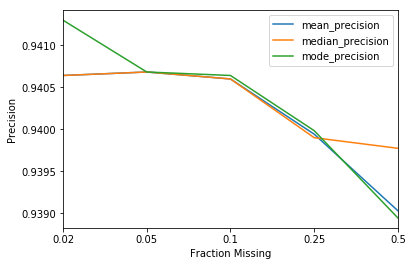

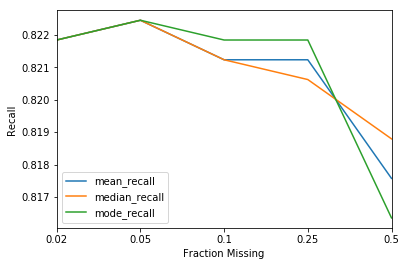

In [18]:
import matplotlib.pyplot as plt

# Plot results
results = pd.DataFrame({'mean_precision':mean_precision, 'mean_recall':mean_recall,
                        'median_precision':median_precision, 'median_recall':median_recall,
                        'mode_precision':mode_precision, 'mode_recall':mode_recall})
print(results)
%matplotlib inline
ax = results.iloc[:,[0,2,4]].plot(xticks = range(len(percent_missing)))
ax.set_xticklabels(percent_missing)
ax.set_ylabel('Precision');
ax.set_xlabel('Fraction Missing');
ax = results.iloc[:,[1,3,5]].plot(xticks = range(len(percent_missing)))
ax.set_xticklabels(percent_missing)
ax.set_ylabel('Recall');
ax.set_xlabel('Fraction Missing');

In general, both precision and recall decrease as more observations from the first feature are replaced with its respective mean, median, or mode. This makes sense as more missing data is imputed with a single value, the less the data resembles the 'ground truth' where all data is present. The trend is not consistently decreasing for several reasons, mainly because the missing values are randomly inserted, and only one out of eight features is actually changing.

### Problem 3: Python for Data Cleaning  

In this problem we will use the 2015 Conneticut Police Stun Gun dataset for data cleaning realted tasks.

### 3.1 Conversion and Coercision

In [10]:
# Read in the datasset
stuns = pd.read_csv("2015-Reported-Taser-Data.csv")
stuns.head()

,Law Enforcement Agency,Number of Incident Reports,Incident Case Number,Date of Incident,Time of Incident,Sex,Race,Hispanic,Height,Weight,Age,Deployment Type I,Deployment Type II
0,Hartford,1,2015-055,1/1/15,15:13,Male,Black,False,"5'10""",220,34,C,NaN
1,Naugatuck,1,15-19,1/1/15,3:48,Male,Black,False,"5'8""",150,26,D,NaN
2,Norwalk,1,15-00010,1/1/15,0:32,Male,White,False,"5'10""",175,22,C,NaN
3,CSP (State Police),1,1500006763,1/4/15,11:41,Male,White,False,"5'10""",150,35,D,NaN
4,Hartford,1,2015-0379,1/5/15,12:52,Male,Black,False,6',153,62,D,NaN


In [11]:
# check the data types of the variables
print("\nData Types:\n")
print(stuns.dtypes)


Data Types:

Law Enforcement Agency        object
Number of Incident Reports     int64
Incident Case Number          object
Date of Incident              object
Time of Incident              object
Sex                           object
Race                          object
Hispanic                        bool
Height                        object
Weight                        object
Age                           object
Deployment Type I             object
Deployment Type II            object
dtype: object


Since the data types for height and weights are objects, convert them to numeric. However since there are some values which are non-numeric use the coerse function to fix this.

In [12]:
stuns_convert = stuns.copy()
stuns_convert['Height'] = pd.to_numeric(stuns_convert['Height'], errors='coerce')
stuns_convert['Weight'] = pd.to_numeric(stuns_convert['Weight'], errors='coerce')
stuns_convert.head()

,Law Enforcement Agency,Number of Incident Reports,Incident Case Number,Date of Incident,Time of Incident,Sex,Race,Hispanic,Height,Weight,Age,Deployment Type I,Deployment Type II
0,Hartford,1,2015-055,1/1/15,15:13,Male,Black,False,NaN,220.0,34,C,NaN
1,Naugatuck,1,15-19,1/1/15,3:48,Male,Black,False,NaN,150.0,26,D,NaN
2,Norwalk,1,15-00010,1/1/15,0:32,Male,White,False,NaN,175.0,22,C,NaN
3,CSP (State Police),1,1500006763,1/4/15,11:41,Male,White,False,NaN,150.0,35,D,NaN
4,Hartford,1,2015-0379,1/5/15,12:52,Male,Black,False,NaN,153.0,62,D,NaN


The 'Weight' feature is able to be coerced to numeric, but the 'Height' feature is not. This is due to the formatting of the feature, with extra characters for feet and inches. There is no way to properly convert this to a numeric value using the standard conversion function.

### 3.2 Convert using a function

Write a function that can convert from the prime notation to inches. Here are some examples of the expected input an output. Be sure to use regular expressions in your answer.

| Input | Output |
|-------|--------|
| 5'6" | 66 |
| 5'6 | 66 |
| 5' | 60 |
| 5 feet | None |
| 5'6' | None |
| 5'F | None |
| 5'6LOL | None |
| 5'120 | None |

In [47]:
import re
import unittest

def checkInches(inches):
    if inches <= 12:
        return 1
    else:
        return 0

def convertHeight(string):
    if not isinstance(string, basestring): # If input is not a string, immediately return None
        return None
    regex1 = r"^[0-9]+\'[0-9]+\"$"
    regex2 = r"^[0-9]+\'[0-9]+$" 
    regex3 = r"^[0-9]+\'$" 
    if re.match(regex1,string):  # Strings like 5'6"
        # Split by single quote (ignore double quote at end)
        height = [int(x) for x in string[:-1].split('\'')]
        feet, inches = height
        if checkInches(inches): # Make sure inches are valid (<= 12)
            height = feet*12 + inches
            return height
        else:
            return None
    elif re.match(regex2,string): # Strings like 5'6
        # Split by single quote
        height = [int(x) for x in string.split('\'')]
        feet, inches = height
        if checkInches(inches): # Make sure inches are valid (<= 12)
            height = feet*12 + inches
            return height
        else:
            return None
    elif re.match(regex3,string): # Strings like 5'
        # Ignore single quote at end
        feet = int(string[:-1])
        height = feet*12
        return height
    else: # All other strings, return None
         return None   

With our function defined, we can run the test cases from the table above:

In [48]:
inputs = ['5\'6"','5\'6','5\'','5 feet','5\'6\'','5\'F','5\'6LOL','5\'120']
outputs = [66, 66, 60, None, None, None, None, None]
for i,test in enumerate(inputs):
    result = convertHeight(test)
    if result == output[i]:
        print('Test passed! Input = %s, Result = %s' % (test,str(result)))
    else:
        raise ValueError('Test failed! Input = %s, Result = %s, Expected = %s' % (test,str(result),str(output[i])))

Test passed! Input = 5'6", Result = 66
Test passed! Input = 5'6, Result = 66
Test passed! Input = 5', Result = 60
Test passed! Input = 5 feet, Result = None
Test passed! Input = 5'6', Result = None
Test passed! Input = 5'F, Result = None
Test passed! Input = 5'6LOL, Result = None
Test passed! Input = 5'120, Result = None


### 3.3 Pandas .apply() method to apply an operation to an entire column

Convert the height and weight column using the function that you created in the previous step.

The weight column was correctly converted to numeric using the standard conversion function, so we'll just focus on the height here.

In [50]:
stuns_convert = stuns.copy()
stuns_convert['Height'] = stuns_convert['Height'].apply(lambda x: convertHeight(x))
stuns_convert['Weight'] = pd.to_numeric(stuns_convert['Weight'], errors='coerce')
stuns_convert.head()

,Law Enforcement Agency,Number of Incident Reports,Incident Case Number,Date of Incident,Time of Incident,Sex,Race,Hispanic,Height,Weight,Age,Deployment Type I,Deployment Type II
0,Hartford,1,2015-055,1/1/15,15:13,Male,Black,False,70.0,220.0,34,C,NaN
1,Naugatuck,1,15-19,1/1/15,3:48,Male,Black,False,68.0,150.0,26,D,NaN
2,Norwalk,1,15-00010,1/1/15,0:32,Male,White,False,70.0,175.0,22,C,NaN
3,CSP (State Police),1,1500006763,1/4/15,11:41,Male,White,False,70.0,150.0,35,D,NaN
4,Hartford,1,2015-0379,1/5/15,12:52,Male,Black,False,72.0,153.0,62,D,NaN


Based on the first few rows, it looks like the conversion worked as expected. Let's see if any values were missed:

In [90]:
# Sum rows with NaN value
nanHeights = pd.isnull(stuns_convert.Height)
print('Number of rows with NaN Height:')
nanHeights.sum()

Number of rows with NaN Height:


40

It looks like some rows weren't converted properly, let's take a closer look:

In [89]:
# Print rows that couldn't convert height
stuns.loc[nanHeights,:]

,Law Enforcement Agency,Number of Incident Reports,Incident Case Number,Date of Incident,Time of Incident,Sex,Race,Hispanic,Height,Weight,Age,Deployment Type I,Deployment Type II
40,CSP (State Police),1,1500072985,2/8/15,5:40,Male,Unknown,False,Unknown,Unknown,28,D,NaN
59,Hartford,1,2015-05636,2/23/15,13:10,Female,Black,False,Unknown,Unknown,20,C,NaN
67,Manchester,1,M201501997,2/28/15,22:40,Male,White,True,Unknown,Unknown,39,C,NaN
70,Coventry,1,15-922,3/1/15,2:31,Male,White,False,Unknown,Unknown,16,L,NaN
71,Coventry,1,15-922,3/1/15,2:31,Male,White,False,Unknown,Unknown,16,L,NaN
77,Winchester,1,15-1333,3/5/15,22:38,Male,White,False,Unknown,Unknown,43,D,NaN
80,East Haven,1,2015-00006247,3/7/15,11:35,Male,White,False,Unknown,Unknown,87,L,NaN
90,East Hartford,1,15-6128,3/11/15,19:53,Male,Black,False,Unknown,Unknown,40,C,D
118,CSP (State Police),1,1500170132,3/28/15,3:45,Male,Black,False,Unknown,Unknown,Unknown,C,NaN
136,CSP (State Police),1,1500193423,4/7/15,19:52,Male,Black,False,Unknown,Unknown,45,C,NaN


These missed conversions are expected, as the heights are either 'Unknown', 'NaN', or 5'1', which is a misprinted height.